## S13 T02: Base de dades MySQL

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

### Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

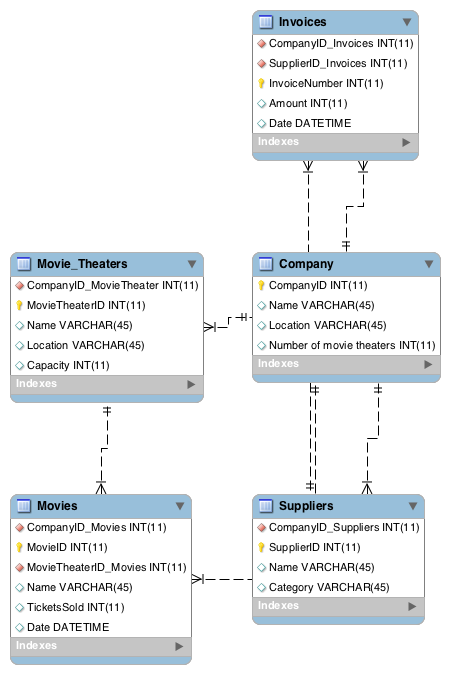

In [2]:
#connecting to MySQL

import mysql.connector

In [3]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Boston82")

print(mydb)

In [4]:
mycursor = mydb.cursor()
mycursor.execute("USE moviesINC")

In [6]:
#create a new table into the database

mycursor.execute("""CREATE TABLE Employees 
                (EmployeeID INT AUTO_INCREMENT PRIMARY KEY, 
                NameEmployee VARCHAR(255), 
                LastName VARCHAR(255), 
                CompanyID_Employee INT)""")

In [8]:
#stating Foreign Keys for Employees

mycursor.execute("""ALTER TABLE Employees ADD FOREIGN KEY (CompanyID_Employee) REFERENCES Company(CompanyID)""")

In [9]:
#showing all tables

mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)

('Company',)
('Employees',)
('Invoices',)
('Movie_Theaters',)
('Movies',)
('Suppliers',)


In [10]:
#inserting values to table Employees
sql = "INSERT INTO Employees (NameEmployee, LastName, CompanyID_Employee) VALUES (%s, %s, %s)"
val = [("Uma", "Thurman", "7890"),
      ("Samuel L.", "Jackson", "7890"),
      ("Kate", "Winslet", "7890")]

mycursor.executemany(sql, val)
mydb.commit()
print(mycursor.rowcount, "record inserted")

3 record inserted


In [12]:
#print all values from table Company
mycursor.execute("SELECT * FROM Company")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(7890, 'MoviesINC', 'Los Angeles', 2)


In [11]:
#print all values from table Employees
mycursor.execute("SELECT * FROM Employees")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Uma', 'Thurman', 7890)
(2, 'Samuel L.', 'Jackson', 7890)
(3, 'Kate', 'Winslet', 7890)


In [13]:
#print all values from table Suppliers
mycursor.execute("SELECT * FROM Suppliers")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(7890, 1, 'Projections', 'Projectors')
(7890, 2, 'SuperClean', 'Cleaning')
(7890, 3, 'ChairsCO', 'Furniture')


In [14]:
#print all values from table Invoices
mycursor.execute("SELECT * FROM Invoices")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(7890, 1, 2, 10000, datetime.datetime(2021, 2, 10, 0, 0))
(7890, 2, 3, 5000, datetime.datetime(2021, 4, 10, 0, 0))
(7890, 3, 4, 8000, datetime.datetime(2021, 6, 19, 0, 0))
(7890, 2, 5, 5000, datetime.datetime(2021, 9, 10, 0, 0))


In [16]:
#print all values from table Movie Theaters
mycursor.execute("SELECT * FROM Movie_Theaters")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(7890, 1, 'Phenomena', 'Chicago', 1000)
(7890, 2, 'Sommerville Theater', 'Sommerville', 500)


In [15]:
#print all values from table Movies
mycursor.execute("SELECT * FROM Movies")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(7890, 1, 1, 'Alien', 500, datetime.datetime(2021, 1, 10, 0, 0))
(7890, 2, 1, 'Matrix', 1000, datetime.datetime(2021, 2, 10, 0, 0))
(7890, 3, 1, 'The Hateful Eight', 780, datetime.datetime(2021, 3, 10, 0, 0))
(7890, 4, 1, 'Magnolia', 200, datetime.datetime(2021, 6, 10, 0, 0))
(7890, 5, 2, 'West Side Story', 100, datetime.datetime(2021, 1, 10, 0, 0))
(7890, 6, 2, 'Mystic River', 1000, datetime.datetime(2021, 2, 10, 0, 0))
(7890, 7, 2, 'The Irishman', 980, datetime.datetime(2021, 5, 10, 0, 0))


### Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [21]:
#Movie Theaters dataframe

query = "SELECT * FROM Movie_Theaters;"
movies_df = pd.read_sql(query,mydb)
movies_df

,CompanyID_MovieTheater,MovieTheaterID,Name,Location,Capacity
0,7890,1,Phenomena,Chicago,1000
1,7890,2,Sommerville Theater,Sommerville,500


In [28]:
#Movies dataframe

query = "SELECT * FROM Movies;"
movies_df = pd.read_sql(query,mydb)
movies_df

,CompanyID_Movies,MovieID,MovieTheaterID_Movies,Name,TicketsSold,Date
0,7890,1,1,Alien,500,2021-01-10
1,7890,2,1,Matrix,1000,2021-02-10
2,7890,3,1,The Hateful Eight,780,2021-03-10
3,7890,4,1,Magnolia,200,2021-06-10
4,7890,5,2,West Side Story,100,2021-01-10
5,7890,6,2,Mystic River,1000,2021-02-10
6,7890,7,2,The Irishman,980,2021-05-10


In [26]:
#Movies Suppliers

query = "SELECT * FROM Suppliers;"
suppliers_df = pd.read_sql(query,mydb)
suppliers_df

,CompanyID_Suppliers,SupplierID,Name,Category
0,7890,1,Projections,Projectors
1,7890,2,SuperClean,Cleaning
2,7890,3,ChairsCO,Furniture


### Exercici 3

Genera algun gràfic que resumeixi les dades. 

In [29]:
movies_df

,CompanyID_Movies,MovieID,MovieTheaterID_Movies,Name,TicketsSold,Date
0,7890,1,1,Alien,500,2021-01-10
1,7890,2,1,Matrix,1000,2021-02-10
2,7890,3,1,The Hateful Eight,780,2021-03-10
3,7890,4,1,Magnolia,200,2021-06-10
4,7890,5,2,West Side Story,100,2021-01-10
5,7890,6,2,Mystic River,1000,2021-02-10
6,7890,7,2,The Irishman,980,2021-05-10


Text(0.5, 0, 'Number of tickers sold')

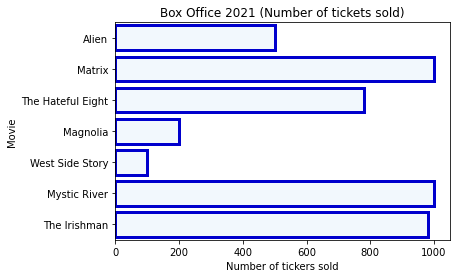

In [40]:
sns.barplot(x='TicketsSold', y='Name', data=movies_df,
           ci=None,
            color='aliceblue',
            edgecolor='mediumblue',
            lw=3
           );

plt.title("Box Office 2021 (Number of tickets sold)",fontsize=12)
plt.ylabel("Movie")
plt.xlabel("Number of tickers sold")

As we can observe "Matrix" and "Mystic River" are the movies with most tickets sold in 2021 for MoviesINC company.

In [56]:
#total invoices for 2021

query = "SELECT * FROM Invoices;"
invoices_df = pd.read_sql(query,mydb)
invoices_df

,CompanyID_Invoices,SupplierID_Invoices,InvoiceNumber,Amount,Date
0,7890,1,2,10000,2021-02-10
1,7890,2,3,5000,2021-04-10
2,7890,3,4,8000,2021-06-19
3,7890,2,5,5000,2021-09-10


Text(0.5, 0, 'Supplier ID')

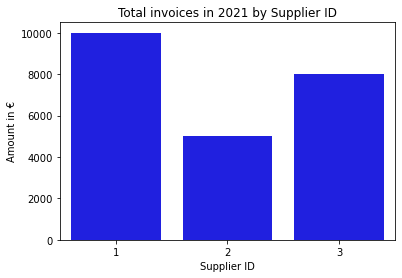

In [57]:
sns.barplot(x='SupplierID_Invoices', y='Amount', data=invoices_df, color='blue');

plt.title("Total invoices in 2021 by Supplier ID",fontsize=12)
plt.ylabel("Amount in €")
plt.xlabel("Supplier ID")